In [81]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ConvNeXtBase
from tensorflow.keras.applications.convnext import preprocess_input
import matplotlib.pyplot as plt
import numpy as np


## ConvNeXt

In [84]:
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 10
SEED = 42

train_ds = tf.keras.utils.image_dataset_from_directory(
    "C:/Users/Rifi Aulia Rahman/OneDrive/Documents/Machine Learning/Train",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode="binary",
    seed=SEED
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "C:/Users/Rifi Aulia Rahman/OneDrive/Documents/Machine Learning/Valid",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode="binary",
    seed=SEED
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "C:/Users/Rifi Aulia Rahman/OneDrive/Documents/Machine Learning/Test",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode="binary",
    shuffle=False
)

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(AUTOTUNE)
val_ds = val_ds.cache().prefetch(AUTOTUNE)
test_ds = test_ds.prefetch(AUTOTUNE)

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.1),
])

base_model = ConvNeXtBase(
    include_top=False,
    weights="imagenet",
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

base_model.trainable = False


Found 503 files belonging to 2 classes.
Found 59 files belonging to 2 classes.
Found 24 files belonging to 2 classes.


In [92]:
inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

x = data_augmentation(inputs)
x = preprocess_input(x)

x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.4)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model_conv = models.Model(inputs, outputs)


In [93]:
model_conv.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=[
        "accuracy",
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc")
    ]
)


In [94]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.2,
        patience=3
    )
]


In [95]:
history = model_conv.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks
)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 422s 26s/step - accuracy: 0.4732 - auc: 0.6177 - loss: 0.9371 - precision: 0.8589 - recall: 0.4502 - val_accuracy: 0.7119 - val_auc: 0.5969 - val_loss: 0.6210 - val_precision: 0.8636 - val_recall: 0.7755 - learning_rate: 1.0000e-04
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 372s 23s/step - accuracy: 0.7105 - auc: 0.8770 - loss: 0.5479 - precision: 0.9599 - recall: 0.6772 - val_accuracy: 0.8814 - val_auc: 0.8408 - val_loss: 0.4678 - val_precision: 0.9200 - val_recall: 0.9388 - learning_rate: 1.0000e-04
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 345s 22s/step - accuracy: 0.8421 - auc: 0.9734 - loss: 0.3481 - precision: 0.9956 - recall: 0.8231 - val_accuracy: 0.9322 - val_auc: 0.8949 - val_loss: 0.3865 - val_precision: 0.9245 - val_recall: 1.0000 - learning_rate: 1.0000e-04
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 343s 22s/step - accuracy: 0.9005 - auc: 0.9549 - loss: 0.2770 - precision: 0.9830 - recall: 0.8989 - val_accuracy: 0.9322 - val_auc: 0.9337 - val_loss: 

In [97]:
test_results = model_conv.evaluate(test_ds)
for name, value in zip(model_conv.metrics_names, test_results):
    print(f"{name}: {value:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 1.0000 - auc: 1.0000 - loss: 0.1710 - precision: 1.0000 - recall: 1.0000
loss: 0.1710
compile_metrics: 1.0000


## Evaluasi Model ConvNeXt

In [98]:
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = model_conv.predict(test_ds)
y_pred = (y_pred > 0.5).astype(int)

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_true, y_pred)
print(cm)
print(classification_report(y_true, y_pred, target_names=["bersih", "tidak_bersih"]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
[[ 6  0]
 [ 0 18]]
              precision    recall  f1-score   support

      bersih       1.00      1.00      1.00         6
tidak_bersih       1.00      1.00      1.00        18

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



## Model Efficient Net

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

In [100]:
IMG_SIZE = 128
BATCH_SIZE = 32
EPOCHS = 10
SEED = 42

train_ds = tf.keras.utils.image_dataset_from_directory(
    "C:/Users/Rifi Aulia Rahman/OneDrive/Documents/Machine Learning/Train",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode="binary",
    seed=SEED
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "C:/Users/Rifi Aulia Rahman/OneDrive/Documents/Machine Learning/Valid",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode="binary",
    seed=SEED
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "C:/Users/Rifi Aulia Rahman/OneDrive/Documents/Machine Learning/Test",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode="binary",
    shuffle=False
)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(AUTOTUNE)
val_ds = val_ds.cache().prefetch(AUTOTUNE)
test_ds = test_ds.prefetch(AUTOTUNE)


Found 503 files belonging to 2 classes.
Found 59 files belonging to 2 classes.
Found 24 files belonging to 2 classes.


In [101]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.1),
])


In [102]:
base_model = EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

base_model.trainable = False


In [103]:
inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

x = data_augmentation(inputs)
x = preprocess_input(x)

x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.4)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model_effnet = models.Model(inputs, outputs)

In [104]:
model_effnet.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=[
        "accuracy",
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc")
    ]
)

In [105]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.2,
        patience=3
    )
]


In [106]:
history_effnet = model_effnet.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks
)


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 476ms/step - accuracy: 0.8428 - auc: 0.7803 - loss: 0.3776 - precision: 0.9048 - recall: 0.9152 - val_accuracy: 0.8305 - val_auc: 0.9724 - val_loss: 0.3631 - val_precision: 0.8305 - val_recall: 1.0000 - learning_rate: 1.0000e-04
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 306ms/step - accuracy: 0.9188 - auc: 0.9201 - loss: 0.2425 - precision: 0.9608 - recall: 0.9457 - val_accuracy: 0.8475 - val_auc: 0.9980 - val_loss: 0.3099 - val_precision: 0.8448 - val_recall: 1.0000 - learning_rate: 1.0000e-04
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 364ms/step - accuracy: 0.9146 - auc: 0.9147 - loss: 0.2461 - precision: 0.9411 - recall: 0.9575 - val_accuracy: 0.8814 - val_auc: 1.0000 - val_loss: 0.2683 - val_precision: 0.8750 - val_recall: 1.0000 - learning_rate: 1.0000e-04
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 358ms/step - accuracy: 0.9312 - auc: 0.9734 - loss: 0.1683 - precision: 0.9792 - recall: 0.9417 - val_accuracy: 0.9322 - val_auc: 1.0000 - val_loss:

In [107]:
test_results = model_effnet.evaluate(test_ds)
for name, value in zip(model_effnet.metrics_names, test_results):
    print(f"{name}: {value:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.9167 - auc: 0.9907 - loss: 0.2027 - precision: 0.9000 - recall: 1.0000
loss: 0.2027
compile_metrics: 0.9167


## Evaluasi Model Efficient Net

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = model_effnet.predict(test_ds)
y_pred = (y_pred > 0.5).astype(int)


cm = confusion_matrix(y_true, y_pred)
print(cm)
print(classification_report(y_true, y_pred, target_names=["bersih", "tidak_bersih"]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[ 4  2]
 [ 0 18]]
              precision    recall  f1-score   support

      bersih       1.00      0.67      0.80         6
tidak_bersih       0.90      1.00      0.95        18

    accuracy                           0.92        24
   macro avg       0.95      0.83      0.87        24
weighted avg       0.92      0.92      0.91        24



## Perbandingan Kurva ROC-AUC

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


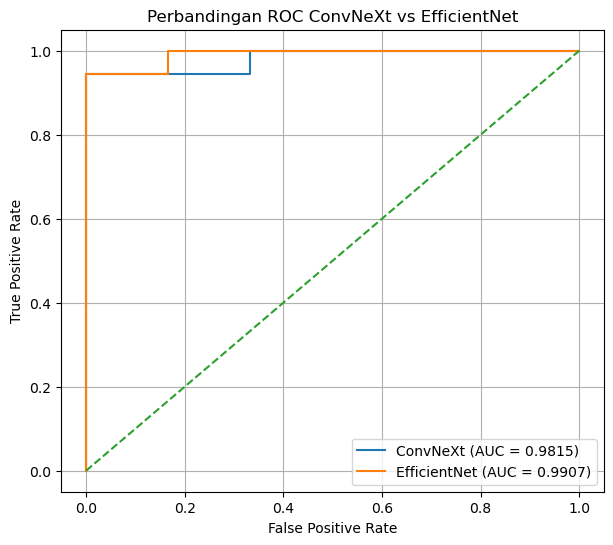

In [ ]:
from sklearn.metrics import roc_curve, auc

y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_prob_convnext = model_conv.predict(test_ds)
y_prob_effnet   = model_effnet.predict(test_ds)

fpr_c, tpr_c, _ = roc_curve(y_true, y_prob_convnext)
auc_c = auc(fpr_c, tpr_c)

fpr_e, tpr_e, _ = roc_curve(y_true, y_prob_effnet)
auc_e = auc(fpr_e, tpr_e)

plt.figure(figsize=(7, 6))

plt.plot(fpr_c, tpr_c, label=f"ConvNeXt (AUC = {auc_c:.4f})")
plt.plot(fpr_e, tpr_e, label=f"EfficientNet (AUC = {auc_e:.4f})")

plt.plot([0, 1], [0, 1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Perbandingan ROC ConvNeXt vs EfficientNet")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## Train vs Valid Loss ConvNeXt

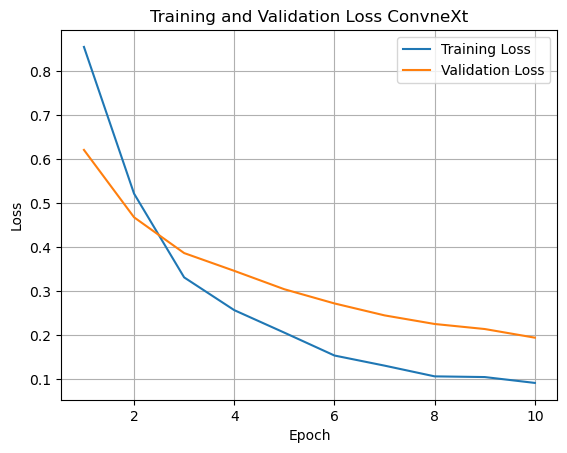

In [ ]:
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(train_loss) + 1)

plt.figure()
plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss ConvneXt")
plt.legend()
plt.grid(True)
plt.show()


## Train vs Valid Loss Efficient Net

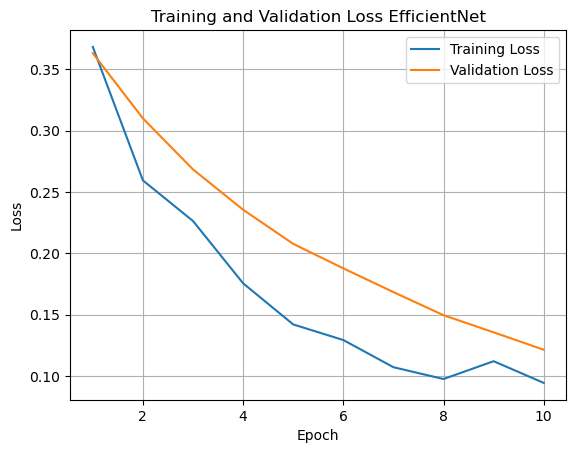

In [ ]:
train_loss = history_effnet.history["loss"]
val_loss = history_effnet.history["val_loss"]
epochs = range(1, len(train_loss) + 1)

plt.figure()
plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss EfficientNet")
plt.legend()
plt.grid(True)
plt.show()


## Perbandingan Kurva Presisi-Recall

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


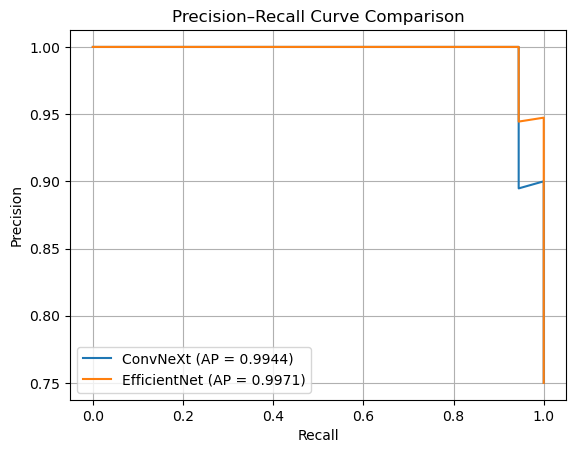

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

y_score_conv = model_conv.predict(test_ds).ravel()
prec_c, rec_c, _ = precision_recall_curve(y_true, y_score_conv)
ap_c = average_precision_score(y_true, y_score_conv)

y_score_eff = model_effnet.predict(test_ds).ravel()
prec_e, rec_e, _ = precision_recall_curve(y_true, y_score_eff)
ap_e = average_precision_score(y_true, y_score_eff)

plt.figure()
plt.plot(rec_c, prec_c, label=f'ConvNeXt (AP = {ap_c:.4f})')
plt.plot(rec_e, prec_e, label=f'EfficientNet (AP = {ap_e:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()
